In [117]:
!/usr/local/bin/python3 -m pip install tensorflow_datasets
!/usr/local/bin/python3 -m pip install keras
!/usr/local/bin/python3 -m pip install tensorflow
!/usr/local/bin/python3 -m pip install keras-vis --upgrade
!/usr/local/bin/python3 -m pip install vis --upgrade
!/usr/local/bin/python3 -m pip install lime

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [52]:
train_ds = image_dataset_from_directory(
    '../data/images/AlzheimerMRIDataset/AugmentedAlzheimerDataset/',
    batch_size=32,
    image_size=(128, 128),
    subset='training',
    validation_split=0.2,
    seed=42
)

val_ds = image_dataset_from_directory(
    '../data/images/AlzheimerMRIDataset/AugmentedAlzheimerDataset/',
    batch_size=64,
    image_size=(128, 128),
    subset='validation',
    validation_split=0.2,
    seed=32
)


Found 33984 files belonging to 4 classes.
Using 27188 files for training.
Found 33984 files belonging to 4 classes.
Using 6796 files for validation.


In [4]:
class_names = train_ds.class_names
class_names

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

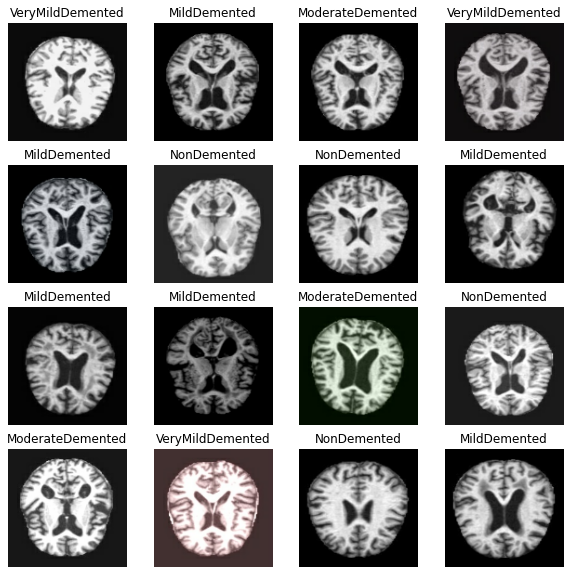

In [53]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [55]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [56]:
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

num_classes = len(class_names)

model = tf.keras.Sequential([
    Rescaling(1./255),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [100]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
850/850 [==============================] - 209s 245ms/step - loss: 0.1879 - accuracy: 0.9255 - val_loss: 0.1595 - val_accuracy: 0.9389
Epoch 2/10
850/850 [==============================] - 223s 262ms/step - loss: 0.1409 - accuracy: 0.9447 - val_loss: 0.1265 - val_accuracy: 0.9544
Epoch 3/10
850/850 [==============================] - 217s 255ms/step - loss: 0.1092 - accuracy: 0.9593 - val_loss: 0.1146 - val_accuracy: 0.9610
Epoch 4/10
850/850 [==============================] - 226s 266ms/step - loss: 0.0829 - accuracy: 0.9692 - val_loss: 0.1010 - val_accuracy: 0.9662
Epoch 5/10
850/850 [==============================] - 222s 261ms/step - loss: 0.0638 - accuracy: 0.9775 - val_loss: 0.1155 - val_accuracy: 0.9616
Epoch 6/10
850/850 [==============================] - 214s 251ms/step - loss: 0.0518 - accuracy: 0.9814 - val_loss: 0.1030 - val_accuracy: 0.9725
Epoch 7/10
850/850 [==============================] - 217s 255ms/step - loss: 0.0525 - accuracy: 0.9817 - val_loss: 0.1068 -

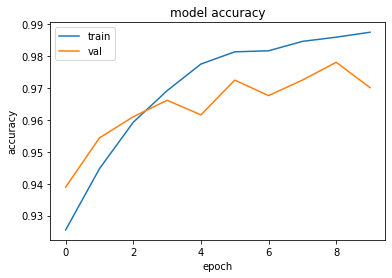

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [95]:
from saliency import plot_features_map

img_idx = plot_features_map(x_test=val_ds[0],ytest=val_ds[1],cnn=model)

TypeError: 'PrefetchDataset' object is not subscriptable

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

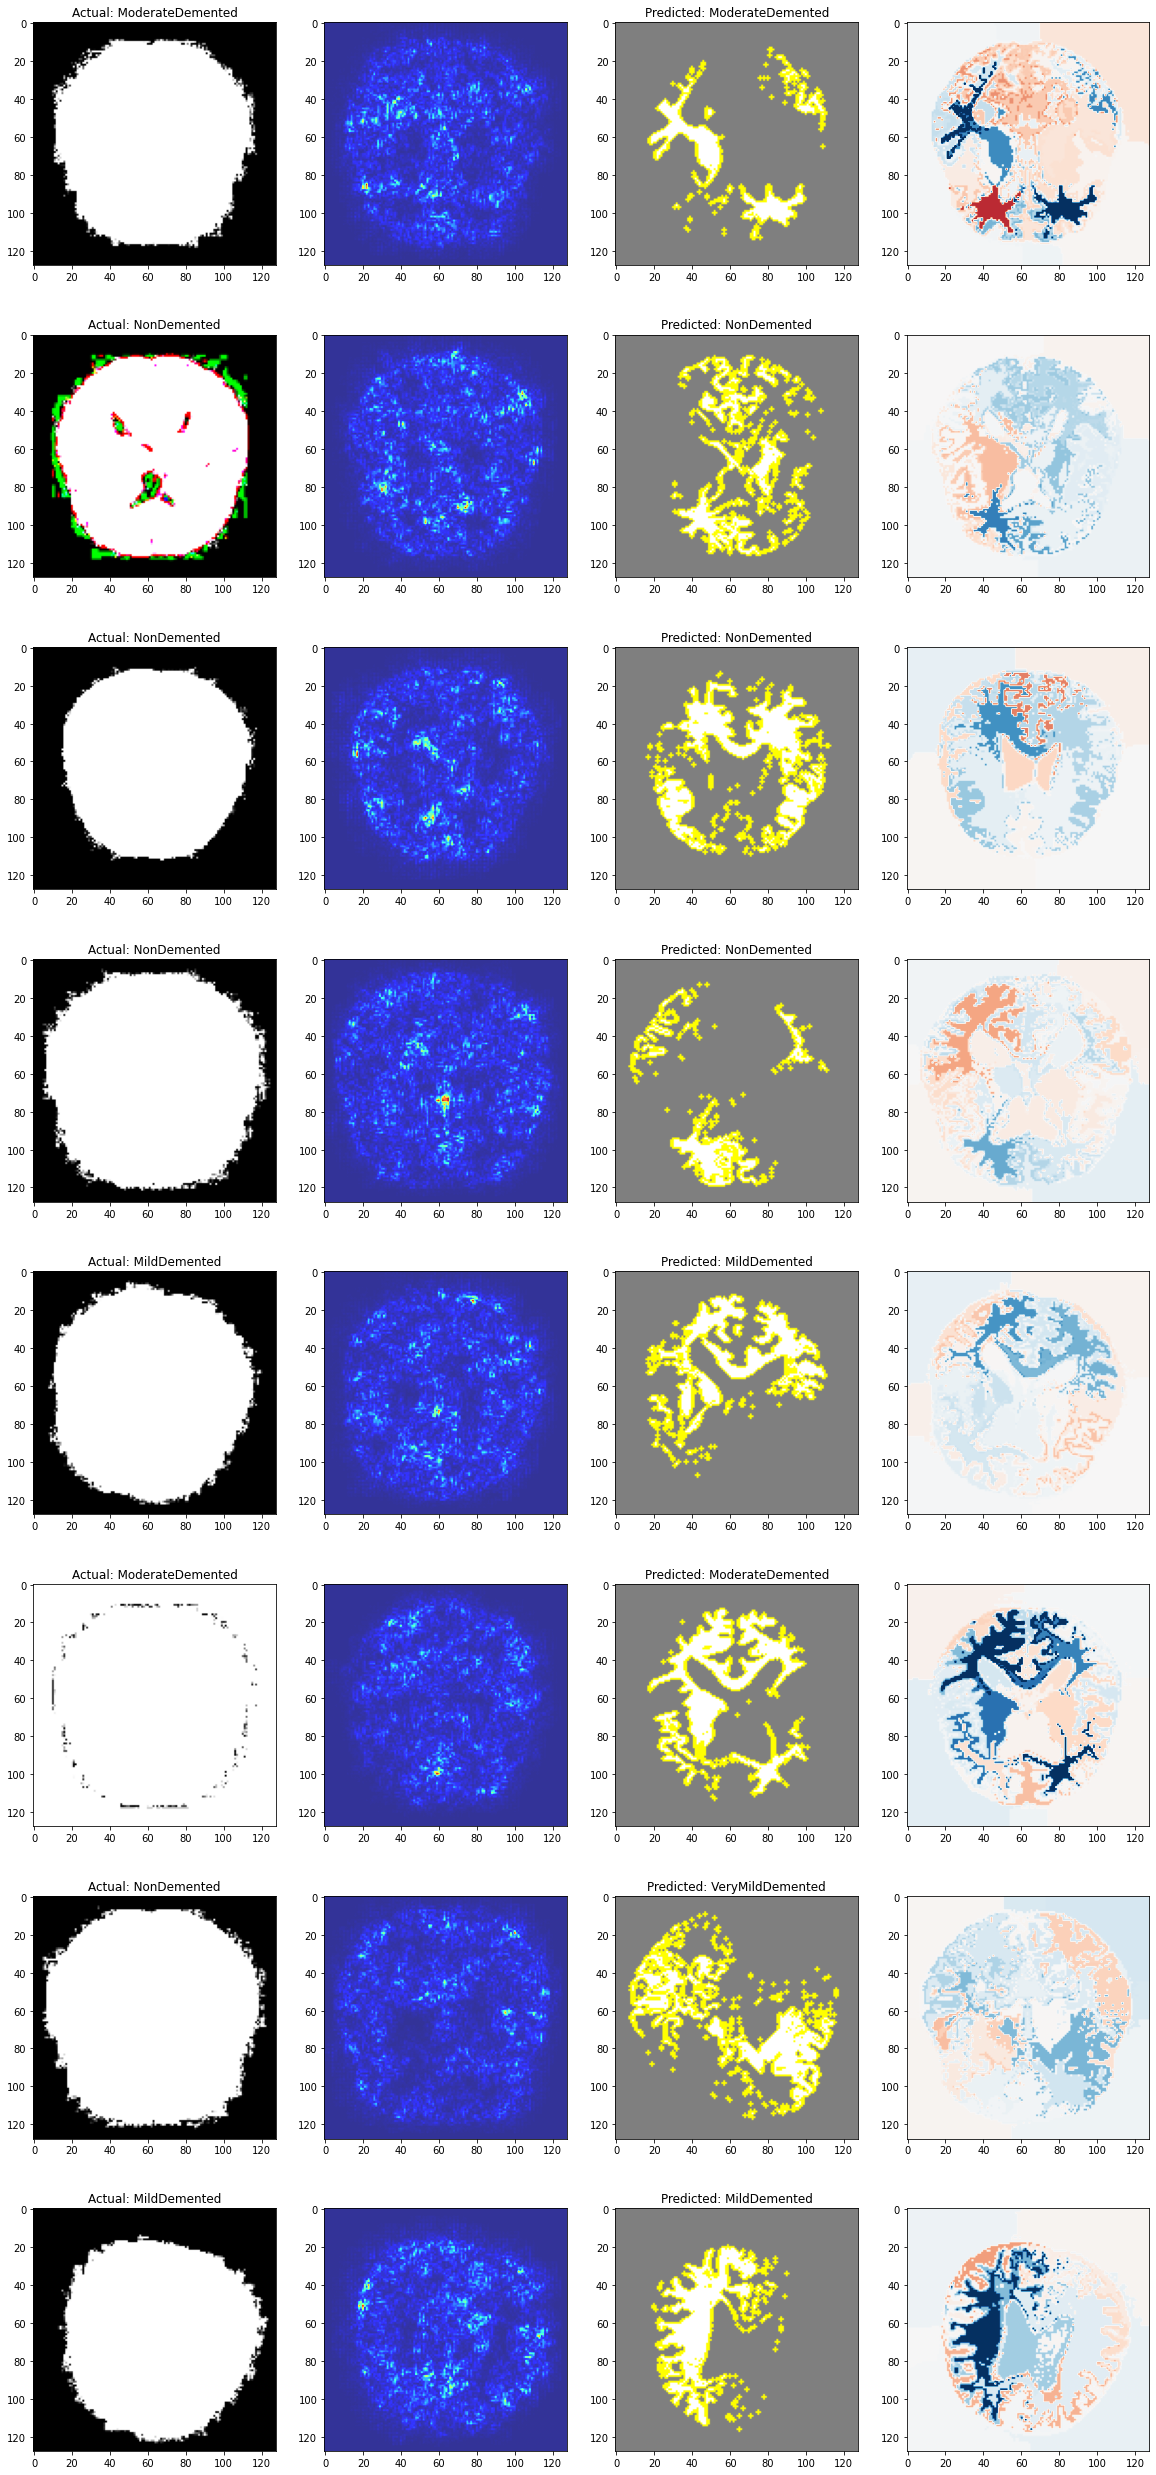

In [136]:
import keras
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

"""
for i, exp in enumerate(explanations):
    ax = plt.subplot(8,4,i*2+1)
    temp, mask = exp.get_image_and_mask(exp.top_labels[0], positive_only=True, num_features=4, hide_rest=True)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    ax = plt.subplot(8, 4, i*2+2)
    #Select the same class explained on the figures above.
    ind =  exp.top_labels[0]

    #Map each explanation weight to the corresponding superpixel
    dict_heatmap = dict(exp.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 

    #Plot. The visualization makes more sense if a symmetrical colorbar is used.
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()
"""
class SaliencyMap():
    def __init__(self, orig_img, saliency_map, boundaries, heatmap, actual, pred):
        self.orig_img = orig_img
        self.saliency_map = saliency_map
        self.boundaries = boundaries
        self.heatmap = heatmap
        self.actual = actual
        self.pred = pred

def create_saliency_map(_img, model):
    img = tf.keras.preprocessing.image.img_to_array(_img)
    img = img.reshape((1, *img.shape))

    images = tf.Variable(img, dtype=float)

    with tf.GradientTape() as tape:
        pred = model(images, training=False)
        max_idx = max(range(len(pred[0])), key=pred[0].__getitem__)
        loss = pred[0][max_idx]
    
    grads = tape.gradient(loss, images)
    dgrad_abs = tf.math.abs(grads)
    dgrad_max_ = np.max(dgrad_abs, axis=3)[0]
    arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
    return (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18), max_idx

def get_boundaries(explanation):
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=4, hide_rest=True)
    return mark_boundaries(temp / 2 + 0.5, mask)

def create_heatmap(explanation):
    ind =  explanation.top_labels[0]
    dict_heatmap = dict(explanation.local_exp[ind])
    return np.vectorize(dict_heatmap.get)(explanation.segments) 

for x, y in val_ds.take(1):
    saliency_maps = []
    explanations = []
    for j in range(8):
        _img = x[j].numpy().astype("uint8")
        explanation = explainer.explain_instance(x[j].numpy().astype("double"), model.predict, top_labels=5, hide_color=0, num_samples=1000)
        
        saliency_map, max_idx = create_saliency_map(_img, model)
        boundaries = get_boundaries(explanation)
        heatmap = create_heatmap(explanation)

        saliency_maps.append(
            SaliencyMap(_img, saliency_map, boundaries, heatmap, class_names[y[j]], class_names[max_idx])
        )

    plt.figure(figsize=(20,45))
    for i, saliency_map in enumerate(saliency_maps):
        plt.subplot(8,4,i*4+1)
        plt.imshow(saliency_map.orig_img)
        plt.title("Actual: " + saliency_map.actual)

        plt.subplot(8,4,i*4+2)
        plt.imshow(saliency_map.saliency_map,cmap="jet",alpha=0.8)
        plt.colorbar
        
        plt.subplot(8,4,i*4+3)
        plt.imshow(saliency_map.boundaries)
        plt.title("Predicted: " + saliency_map.pred)

        plt.subplot(8,4,i*4+4)
        plt.imshow(saliency_map.heatmap, cmap='RdBu', vmin=-heatmap.max(), vmax=heatmap.max())
        plt.colorbar()

In [130]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

explanations = []

for x, y in val_ds.take(1):
    for i in range(16):
        explanation = explainer.explain_instance(x[i].numpy().astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
        explanations.append(explanation)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

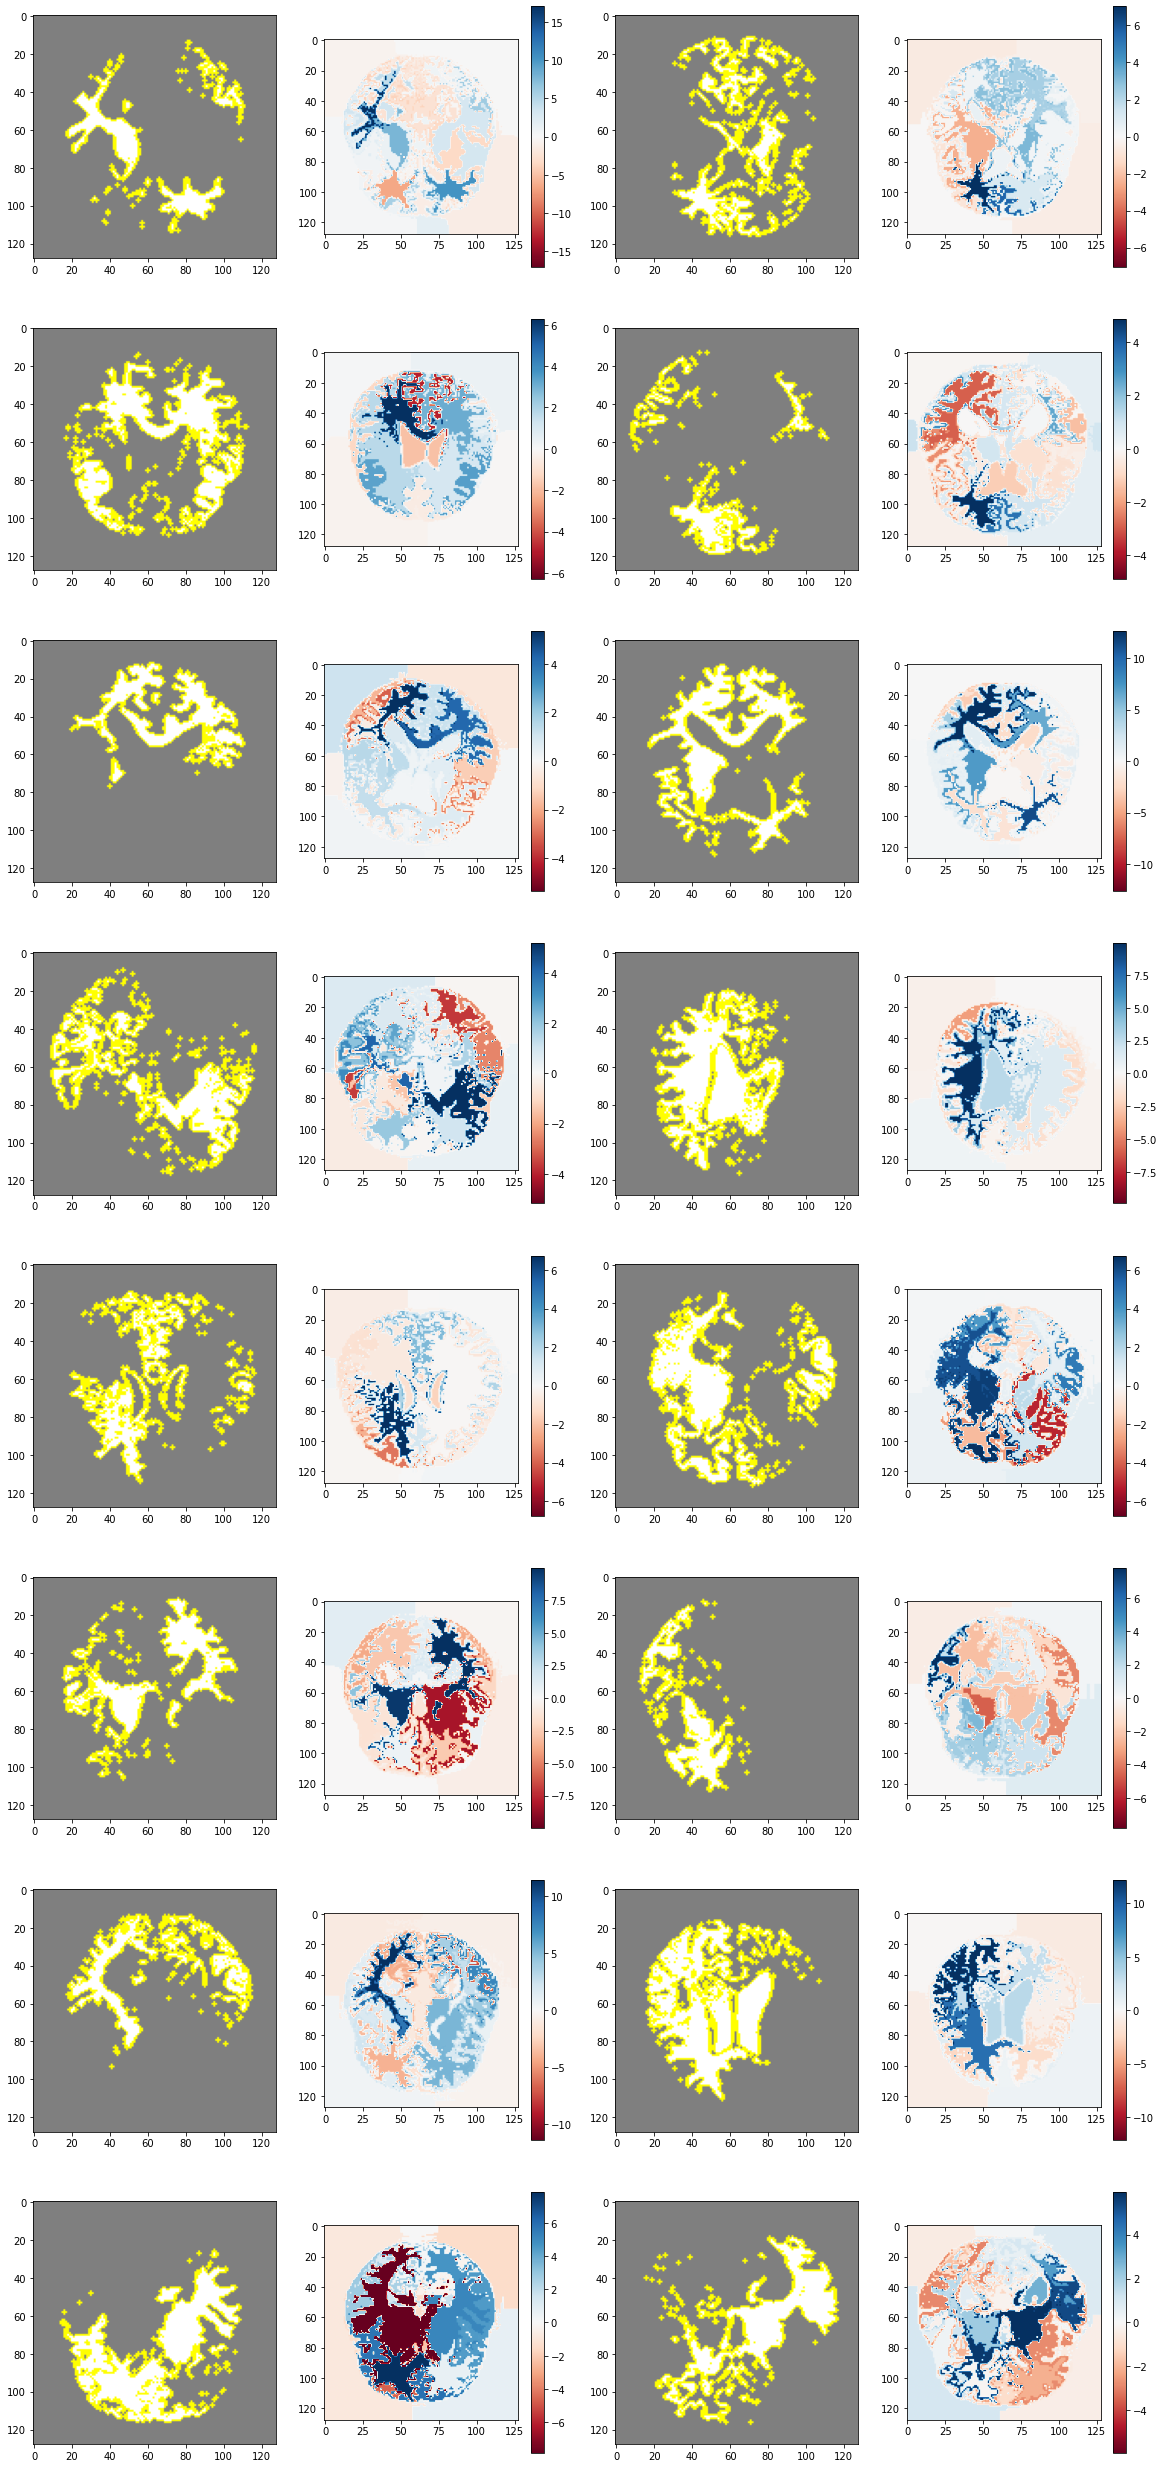

In [133]:
from skimage.segmentation import mark_boundaries

plt.figure(figsize=(20,45))
for i, exp in enumerate(explanations):
    ax = plt.subplot(8,4,i*2+1)
    temp, mask = exp.get_image_and_mask(exp.top_labels[0], positive_only=True, num_features=4, hide_rest=True)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    ax = plt.subplot(8, 4, i*2+2)
    #Select the same class explained on the figures above.
    ind =  exp.top_labels[0]

    #Map each explanation weight to the corresponding superpixel
    dict_heatmap = dict(exp.local_exp[ind])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments) 

    #Plot. The visualization makes more sense if a symmetrical colorbar is used.
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()

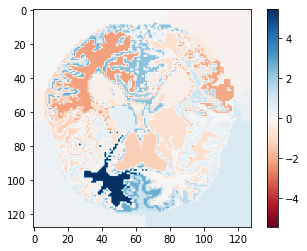

In [126]:

#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

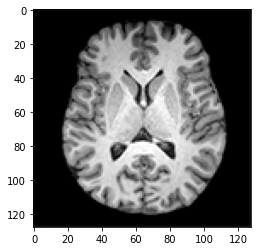

In [110]:
from tensorflow.keras.preprocessing import image

img = image.load_img('./IMG_7957.jpg', target_size=(128,128))

plt.imshow(img)

In [111]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

print(model.predict(img_preprocessed))

1/1 [==============================] - 0s 39ms/step
[[-27.539656  -44.031937   24.00344     7.9143677]]


In [112]:
print(class_names[1])

ModerateDemented
